In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pickle

from gpu import set_gpu
from matplotlib import pyplot as plt
import loop
import session
import plot_utils 
set_gpu()

plt.rcParams['figure.dpi'] = 300
%matplotlib qt

Using TensorFlow backend.


Num GPUs Available:  1


In [37]:
sub_type = 'TR'
with open('train_data_raw_'  + sub_type + '.p', 'rb') as f:
    raw, params,feat,feat_sq = pickle.load(f)

In [12]:
# Loop through training
train_dict = {'sub_type':sub_type,'n_train':'fullgaussflat4', 'load':True, 'train_scale':5, 'epochs': 30, 'batch_size' : 128, 'sparsity':True,'dt':'manual','feat_type':'feat','noise':True, 'latent_dim':4,'mod':['lda'],'gens':50, 'mod_dt':'1012','train_grp':2}
train_sess = session.Session(**train_dict)

# loop through subjects
for sub_i in range(2,np.max(params[:,0])+1):
    for lat in range(5,6):#1,11):
        train_sess.latent_dim = lat
        train_out = train_sess.loop_cv(raw,params,sub=sub_i,mod=['ext_c','aligned'])
        # for key,val in train_out.items():
        #     exec(key + '=val')


Running sub 2, model 2, latent dim 5, cv 1
loading data
['loss', 'decoder_loss', 'clf_loss', 'decoder_accuracy', 'clf_accuracy']
[6.834 5.411 1.421 0.059 0.474]
[9.044 8.197 0.845 0.057 0.678]
[7.644 6.91  0.732 0.055 0.712]
[8.898 8.227 0.669 0.055 0.728]
[9.12  8.525 0.593 0.056 0.758]
[9.922 9.376 0.544 0.056 0.78 ]
[10.28   9.781  0.496  0.055  0.797]
[10.966 10.495  0.468  0.056  0.806]
[12.152 11.68   0.47   0.056  0.813]
[12.298 11.864  0.432  0.056  0.826]
[11.972 11.549  0.421  0.056  0.831]
[13.207 12.784  0.421  0.057  0.83 ]
[13.092 12.692  0.398  0.057  0.84 ]
[13.278 12.885  0.391  0.057  0.838]
[13.126 12.734  0.39   0.057  0.833]
[5.24  4.679 0.56  0.057 0.798]
[4.225 3.67  0.554 0.056 0.818]
[3.211 2.663 0.546 0.056 0.839]
[2.929 2.393 0.534 0.056 0.836]
[2.76  2.237 0.521 0.056 0.843]
[2.653 2.133 0.518 0.055 0.837]
[2.594 2.087 0.505 0.056 0.837]
[2.539 2.039 0.499 0.056 0.838]
[2.515 2.    0.514 0.055 0.828]
[2.486 1.965 0.519 0.055 0.824]
[2.477 1.961 0.514 0.056 0

In [13]:
sub_type = 'AB'
with open('train_data_raw_'  + sub_type + '.p', 'rb') as f:
    raw, params,feat,feat_sq = pickle.load(f)

# Loop through training
train_dict = {'sub_type':sub_type,'n_train':'fullgaussflat4', 'load':True, 'train_scale':5, 'epochs': 30, 'batch_size' : 128, 'sparsity':True,'dt':'manual','feat_type':'feat','noise':True, 'latent_dim':4,'mod':['lda'],'gens':50, 'mod_dt':'1012','train_grp':2}
train_sess = session.Session(**train_dict)

# loop through subjects
for sub_i in range(1,np.max(params[:,0])+1):
    for lat in range(5,6):#1,11):
        train_sess.latent_dim = lat
        train_out = train_sess.loop_cv(raw,params,sub=sub_i,mod=['ext_c','aligned'])
        # for key,val in train_out.items():
        #     exec(key + '=val')


Running sub 1, model 2, latent dim 5, cv 1
loading data
['loss', 'decoder_loss', 'clf_loss', 'decoder_accuracy', 'clf_accuracy']
[5.893 4.266 1.626 0.059 0.347]
[34.763 33.265  1.497  0.058  0.43 ]
[20.604 19.236  1.367  0.057  0.491]
[15.318 14.079  1.237  0.057  0.547]
[13.256 12.105  1.15   0.057  0.576]
[13.679 12.636  1.042  0.058  0.598]
[11.903 10.872  1.029  0.058  0.614]
[10.947  9.934  1.011  0.058  0.617]
[10.734  9.795  0.938  0.058  0.651]
[10.828  9.911  0.916  0.058  0.661]
[11.065 10.129  0.935  0.058  0.653]
[11.116 10.162  0.953  0.058  0.647]
[11.52  10.547  0.972  0.059  0.642]
[11.138 10.196  0.941  0.059  0.657]
[11.357 10.448  0.908  0.058  0.673]
[4.92  4.11  0.809 0.059 0.679]
[4.047 3.232 0.814 0.059 0.696]
[3.515 2.695 0.819 0.059 0.704]
[3.303 2.443 0.86  0.059 0.69 ]
[3.244 2.366 0.876 0.059 0.674]
[3.075 2.223 0.851 0.058 0.695]
[3.046 2.186 0.859 0.059 0.696]
[3.022 2.15  0.87  0.058 0.689]
[3.004 2.121 0.882 0.059 0.68 ]
[2.994 2.088 0.904 0.059 0.675]
[

In [ ]:
all_acc, all_val = plot_utils.plot_latent_dim(params,train_sess)

In [38]:
# reduce dimensions of inputs
sub = 2
test_dict = {'sub_type':sub_type,'dt':'manual', 'mod_dt':'1012','sparsity':True, 'load':True, 'batch_size':128, 'latent_dim':5, 'epochs':30,'train_scale':5, 'n_train':'fullgaussflat4', 'n_test':'partgauss4','feat_type':'feat', 'noise':True,'train_grp':2}
test_sess = session.Session(**test_dict)
ntype = 'gauss'
addon = True

if not addon:
    x_clean_lda = np.array([]).reshape(0,6)
    x_clean_noise = np.array([]).reshape(0,6)
    x_clean_sae = np.array([]).reshape(0,5)
    x_clean_cnn = np.array([]).reshape(0,5)
    x_clean_vcnn = np.array([]).reshape(0,5)
    y_clean = np.array([]).reshape(0,1)

    x_noisy_lda = np.array([]).reshape(0,6)
    x_noisy_noise = np.array([]).reshape(0,6)
    x_noisy_sae = np.array([]).reshape(0,5)
    x_noisy_cnn = np.array([]).reshape(0,5)
    x_noisy_vcnn = np.array([]).reshape(0,5)
    y_noisy = np.array([]).reshape(0,1)

if ntype == 'flat':
    test_max = 2
else:
    test_max = 6

for i in range(1,5):
    test_sess.n_test = 'part' + ntype + str(i)
    for test_scale in range(1,test_max):
        red_out = test_sess.reduce_latent(raw, params, sub, cv=1,test_scale=1)
        for key,val in red_out.items():
            exec(key + '=val')
        x_clean_lda = np.vstack([x_test_lda_red[:clean_size,:], x_clean_lda])
        x_clean_noise = np.vstack([x_test_noise_red[:clean_size,:], x_clean_noise])
        x_clean_sae = np.vstack([x_test_sae_red[:clean_size,:], x_clean_sae])
        x_clean_cnn = np.vstack([x_test_cnn_red[:clean_size,:], x_clean_cnn])
        x_clean_vcnn = np.vstack([x_test_vcnn_red[:clean_size,:], x_clean_vcnn])
        y_clean = np.vstack([y_test[:clean_size,:], y_clean])

        x_noisy_lda = np.vstack([x_test_lda_red[clean_size:,:], x_noisy_lda])
        x_noisy_noise = np.vstack([x_test_noise_red[clean_size:,:], x_noisy_noise])
        x_noisy_sae = np.vstack([x_test_sae_red[clean_size:,:], x_noisy_sae])
        x_noisy_cnn = np.vstack([x_test_cnn_red[clean_size:,:], x_noisy_cnn])
        x_noisy_vcnn = np.vstack([x_test_vcnn_red[clean_size:,:], x_noisy_vcnn])
        y_noisy = np.vstack([y_test[clean_size:,:], y_noisy])


Loading training data: traindata_manual/TR2_traindata_2.p
loading data
Loading training data: traindata_manual/TR2_traindata_2.p
loading data
Loading training data: traindata_manual/TR2_traindata_2.p
loading data


KeyboardInterrupt: 

In [27]:
# Plot reduced dimensions
plot_utils.plot_latent_rep(x_clean_lda, y_clean)
plot_utils.plot_latent_rep(x_clean_noise, y_clean)
plot_utils.plot_latent_rep(x_clean_sae, y_clean)
plot_utils.plot_latent_rep(x_clean_cnn, y_clean)
plot_utils.plot_latent_rep(x_clean_vcnn, y_clean)

In [28]:
plot_utils.plot_latent_rep(x_noisy_lda, y_noisy)
plot_utils.plot_latent_rep(x_noisy_noise, y_noisy)
plot_utils.plot_latent_rep(x_noisy_sae, y_noisy)
plot_utils.plot_latent_rep(x_noisy_cnn, y_noisy)
plot_utils.plot_latent_rep(x_noisy_vcnn, y_noisy)

In [33]:
x_all_lda = np.vstack([x_clean_lda,x_noisy_lda])
x_all_noise = np.vstack([x_clean_noise,x_noisy_noise])
x_all_sae = np.vstack([x_clean_sae,x_noisy_sae])
x_all_cnn = np.vstack([x_clean_cnn,x_noisy_cnn])
x_all_vcnn = np.vstack([x_clean_vcnn,x_noisy_vcnn])
y_all = np.vstack([y_clean, y_noisy])
plot_utils.plot_latent_rep(x_all_lda, y_all)
plot_utils.plot_latent_rep(x_all_noise, y_all)
plot_utils.plot_latent_rep(x_all_sae, y_all)
plot_utils.plot_latent_rep(x_all_cnn, y_all)
plot_utils.plot_latent_rep(x_all_vcnn, y_all)

In [39]:
import os
import copy as cp
test_dict = {'sub_type':sub_type,'dt':'manual', 'mod_dt':'1012','sparsity':True, 'load':True, 'batch_size':128, 'latent_dim':5, 'epochs':30,'train_scale':5, 'n_train':'fullgaussflat4', 'n_test':'partgauss4','feat_type':'feat', 'noise':True,'train_grp':2}
test_sess = session.Session(**test_dict)

load = False
ntype = 'posgauss1'

if ntype[:3] == 'pos':
    i_start = 3
    i_end = 6
    acc_all = np.full([np.max(params[:,0]), 3, 4, 15],np.nan)
    acc_clean = np.full([np.max(params[:,0]), 3, 4, 15],np.nan)
    acc_noise = np.full([np.max(params[:,0]), 3, 4, 15],np.nan)
elif ntype == 'flat':
    i_start = 1
    i_end = 5
    acc_all = np.full([np.max(params[:,0]), 4, 1, 15],np.nan)
    acc_clean = np.full([np.max(params[:,0]), 4, 1, 15],np.nan)
    acc_noise = np.full([np.max(params[:,0]), 4, 1, 15],np.nan)
else:
    i_start = 1
    i_end = 5
    acc_all = np.full([np.max(params[:,0]), 4, 5, 15],np.nan)
    acc_clean = np.full([np.max(params[:,0]), 4, 5, 15],np.nan)
    acc_noise = np.full([np.max(params[:,0]), 4, 5, 15],np.nan)

for i in range(i_start,i_end):
    test_sess.n_test = 'part' + ntype + str(i)

    if load:
        for sub in range(1,np.max(params[:,0])):
            foldername = test_sess.create_foldername()
            filename = test_sess.create_filename(foldername,0,sub)#results=True)
            print(filename)
            if os.path.isfile(filename + '_' + test_sess.n_test + '_cvresults.p'):
                with open(filename + '_' + test_sess.n_test + '_cvresults.p', 'rb') as f:
                    temp_all, temp_noise, temp_clean = pickle.load(f)
                acc_all[sub-1,i-i_start,:,:], acc_clean[sub-1,i-i_start,:,:], acc_noise[sub-1,i-i_start,:,:] = np.squeeze(temp_all),np.squeeze(temp_clean),np.squeeze(temp_noise)
    else:
        test_out = test_sess.loop_test(raw, params)
        for key,val in test_out.items():
            exec(key + '=val')

ave_pos_noise= np.nanmean(acc_noise,axis=0)
ave_pos_clean = np.nanmean(acc_clean,axis=0)
ave_noise= np.nanmean(acc_noise,axis=2)
ave_clean = np.nanmean(acc_clean,axis=2)
ave_gauss_noise = np.nanmean(ave_noise,axis=0)
ave_gauss_clean = np.nanmean(ave_clean,axis=0)

if ntype == 'gauss':
    ave_gauss= cp.deepcopy(ave_noise)
elif ntype == '60hz':
    ave_60hz= cp.deepcopy(ave_noise)
else:
    ave_flat= cp.deepcopy(ave_noise)

models_2_manual_1012/TR1_feat_dim_5_ep_30_bat_128_fullgaussflat4_5_lr_10_sparse
models_2_manual_1012/TR2_feat_dim_5_ep_30_bat_128_fullgaussflat4_5_lr_10_sparse
models_2_manual_1012/TR3_feat_dim_5_ep_30_bat_128_fullgaussflat4_5_lr_10_sparse
models_2_manual_1012/TR4_feat_dim_5_ep_30_bat_128_fullgaussflat4_5_lr_10_sparse
models_2_manual_1012/TR5_feat_dim_5_ep_30_bat_128_fullgaussflat4_5_lr_10_sparse
models_2_manual_1012/TR6_feat_dim_5_ep_30_bat_128_fullgaussflat4_5_lr_10_sparse
models_2_manual_1012/TR1_feat_dim_5_ep_30_bat_128_fullgaussflat4_5_lr_10_sparse
models_2_manual_1012/TR2_feat_dim_5_ep_30_bat_128_fullgaussflat4_5_lr_10_sparse
models_2_manual_1012/TR3_feat_dim_5_ep_30_bat_128_fullgaussflat4_5_lr_10_sparse
models_2_manual_1012/TR4_feat_dim_5_ep_30_bat_128_fullgaussflat4_5_lr_10_sparse
models_2_manual_1012/TR5_feat_dim_5_ep_30_bat_128_fullgaussflat4_5_lr_10_sparse
models_2_manual_1012/TR6_feat_dim_5_ep_30_bat_128_fullgaussflat4_5_lr_10_sparse
models_2_manual_1012/TR1_feat_dim_5_ep_3

C:\ProgramData\Anaconda3\envs\tf-2\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: Mean of empty slice
C:\ProgramData\Anaconda3\envs\tf-2\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: Mean of empty slice


In [155]:
plot_utils.plot_summary(ave_clean,ave_gauss,ave_60hz,ave_flat)

In [18]:
# Plot accuracy vs. # noisy electrodes
fig,ax = plt.subplots(1,3)
c = ['k','r','m']
c_i = 0
for i in range(1,5):
    ax[0].plot(100*ave_gauss_noise[:,i],'-o')
for i in range(6,10):    
    ax[1].plot(100*ave_gauss_noise[:,i],'-o')
for i in [10,11,14]:
    ax[2].plot(100*ave_gauss_noise[:,i],'-o',color=c[c_i])
    c_i+=1    

ax[0].set_ylabel('Accuracy (%)')
fig.text(0.5, 0, 'Number of Noisy Electrodes', ha='center')
ax[0].legend(['sae','cnn','vcnn','ecnn'])
ax[1].legend(['sae-lda','cnn-lda','vcnn-lda','ecnn-lda'])
ax[2].legend(['LDA','LDA-corrupt','LDA-ch'])
ax[0].set_title('NN')
ax[1].set_title('Aligned')
ax[2].set_title('LDA')
ax[1].set_yticks([])
ax[2].set_yticks([])
for i in range(0,3):
    ax[i].set_ylim(0,100)
    ax[i].set_xticks(range(0,4))
    ax[i].set_xticklabels(['1','2','3','4'])

fig.set_tight_layout(True)

# Plot accuracy vs. # noisy electrodes

fig, ax = plt.subplots()

x = np.arange(8)  # the label locations
arr = [5,2,3,9,7,8,10,11]
c = ['tab:blue','tab:orange','tab:green','tab:blue','tab:orange','tab:green','k','r']
clean_all = ave_gauss_clean[0,arr]
ax.bar(x,clean_all*100,color=c)
ax.set_xticks(range(8))
ax.set_xticklabels(['SAE','CNN','VCNN','SAE-LDA','CNN-LDA','VCNN-LDA','LDA','LDA-corrupt'])
ax.set_ylabel('Accuracy (%)')
ax.set_ylim([0,100])

fig.set_tight_layout(True)

In [36]:
# Plot accuracy vs. # noisy electrodes
fig,ax = plt.subplots(3,3)
for r in range(0,3):
    for i in range(1,4):
        ax[r,0].plot(ave_pos_noise[r,:,i],'-o')
    for i in range(6,9):    
        ax[r,1].plot(ave_pos_noise[r,:,i],'-o')
        
    for i in [10,11]:
        ax[r,2].plot(ave_pos_noise[r,:,i],'-o')    
    ax[r,1].set_yticks([])
    ax[r,2].set_yticks([])
    for i in range(0,3):
        ax[r,i].set_ylim(0,1)
        ax[r,i].set_xticks([])
        ax[2,i].set_xticks(range(0,4))
        ax[2,i].set_xticklabels(['1','2','3','4'])
ax[1,0].set_ylabel('Accuracy')
fig.text(0.5, 0, 'Limb Position', ha='center')
ax[0,0].legend(['sae','cnn','vcnn','ecnn'])
ax[0,1].legend(['sae-lda','cnn-lda','vcnn-lda','ecnn-lda'])
ax[0,2].legend(['LDA','LDA-corrupt'])

fig.set_tight_layout(True)

In [15]:
## Plot training metrics trajectories
# initialize parameters
train_grp = 2
dt = 'cv'
feat_type = 'feat'
latent_dim = 5
epochs = 30
n_train = 'fullgaussflat4'
train_scale = 5
foldername = 'models' + '_' + str(train_grp) + '_' + dt
batch_size = 128
n_test = 0
lr = 0.001

# initialize loss and accuracy matrices
loss = np.full([4,4,epochs],np.nan)
val_loss = np.full([4,4,epochs],np.nan)
acc = np.full([4,4,epochs],np.nan)
val_acc = np.full([4,4,epochs],np.nan)

# loop through subjects
for sub in range(1,2):#6):
    # loop through cross validations
    for cv in range(1,5):
        # load data
        filename = foldername + '/' + sub_type + str(sub) + '_' + feat_type + '_dim_' + str(latent_dim) + '_ep_' + str(epochs) + '_bat_' + str(batch_size) + '_' + n_train + '_' + str(train_scale) + '_lr_' + str(int(lr*10000)) 
        filename += '_cv_'+ str(cv) + '_sparse'
        with open(filename + '_hist.p', 'rb') as f:
            svae_hist, sae_hist, cnn_hist, vcnn_hist = pickle.load(f)

        svae_hist = np.transpose(svae_hist)

        # compile losses and accuracies (uncomment back if all models have same # epochs)
        loss[cv-1,:2,:] = np.array([svae_hist[2,:], sae_hist['loss']])#, cnn_hist['loss'], vcnn_hist['loss']])
        val_loss[cv-1,:2,:] = np.array([svae_hist[9,:], sae_hist['val_loss']])#, cnn_hist['val_loss'], vcnn_hist['val_loss']])
        acc[cv-1,:2,:] = np.array([svae_hist[5,:], sae_hist['accuracy']])#, cnn_hist['accuracy'], vcnn_hist['accuracy']])
        val_acc[cv-1,:2,:] = np.array([svae_hist[-2,:], sae_hist['val_accuracy']])#, cnn_hist['val_accuracy'], vcnn_hist['val_accuracy']])

        # 0-30 for 30 epochs
        loss[cv-1,2:,0:30] = np.array([cnn_hist['loss'], vcnn_hist['loss']])
        val_loss[cv-1,2:,0:30] = np.array([cnn_hist['val_loss'], vcnn_hist['val_loss']])
        acc[cv-1,2:,0:30] = np.array([cnn_hist['accuracy'], vcnn_hist['clf_accuracy']])
        val_acc[cv-1,2:,0:30] = np.array([cnn_hist['val_accuracy'], vcnn_hist['val_clf_accuracy']])

    # load results
    resultsfile = filename
    # with open(resultsfile + '_results.p', 'rb') as f:
    #     acc_all, acc_clean, acc_noise = pickle.load(f)

    # average metrics over cvs
    ave_loss = np.mean(loss,axis=0)
    ave_val_loss = np.mean(val_loss,axis=0)
    ave_acc = np.mean(acc,axis=0)
    ave_val_acc = np.mean(val_acc,axis=0)

    # plot metrics over epochs
    plt.figure(sub)
    for i in range(0,4):
        ax = plt.subplot(2,2,i+1)
        ax.plot(ave_loss[i])
        ax.plot(ave_val_loss[i])
        # ax.set_ylim(0,5)
    plt.figure(sub+1)
    for i in range(0,4):
        ax2 = plt.subplot(2,2,i+1)
        ax2.plot(ave_acc[i])
        ax2.plot(ave_val_acc[i])
        ax2.set_ylim(0,1)

FileNotFoundError: [Errno 2] No such file or directory: 'models_2_cv/TR1_feat_dim_5_ep_30_bat_128_fullgaussflat4_5_lr_10_cv_1_sparse_hist.p'

In [ ]:
# Plot generated or reconstructed features
col = ['k','b','r','g','c','y','m']
fig = plt.figure()

# number of channels
ch_max = x_noise.shape[1]

# number of classes
cl_max = y_train.shape[1]

# loop through channels
for i in range(0,ch_max-1):
    ax = plt.subplot(6,1,i+1)

    # loop through classes
    for cl in range(2,3):
        # index inputs from current class
        x_noise_cl = x_noise[y_train[:,cl]==1,i,:]
        x_clean_cl = x_clean[y_train[:,cl]==1,i,:]
        dec_ind = gen_clf == cl

        ## plot all noisy features
        # for x_all in range(0,x_noise_cl.shape[0]):
        #     ax.plot(x_noise_cl[x_all,:,0],col[cl],linewidth=1)

        ## plot all clean features
        for x_all in range(0,x_clean_cl.shape[0]):
            ax.plot(x_clean_cl[x_all,:,0],col[cl],linewidth=.5,linestyle='-')

        ## plot all decoder output
        max_gen = 100
        ax.plot(np.transpose(dec_out[dec_ind,i,:,0][:max_gen,:]),col[cl+1],linewidth=.5,linestyle='--')
        
        ## plot mean of noisy features
        # ax.plot(np.mean(x_cl[:x_cl.shape[0],:,0],axis=0),col[cl],linewidth=1)

        ## plot mean of clean features
        # ax.plot(np.mean(x_clean_cl[:x_clean_cl.shape[0],:,0],axis=0),col[cl],linewidth=1,linestyle=':')

        ## plot mean of reconstructed output
        # rec_cl = dec_out[y_train[:,cl]==1,i,:]
        # ax.plot(np.mean(rec_cl[:,:,0],axis=0),col[cl],linewidth=1,linestyle='--')
        
        ## plot mean of decoder output
        # ax.plot(np.mean(np.transpose(dec_out[dec_ind,i,:,0]),axis=1),col[cl+1],linewidth=.5,linestyle='--')

    ax.set_ylim([0,1])

In [7]:
# Load noise results
sub_all, sub_noise, sub_clean, ave_all, ave_noise, ave_clean = loop.ave_results(params, sub_type, train_grp=2, feat_type='feat',epochs=30,n_train='fullgaussflat4',train_scale=5,n_test='partgauss2', latent_dim=4,loop_i='noise', dt='cv')
sub_all, sub_noise, sub_clean, flat_ave_all, flat_ave_noise, flat_ave_clean = loop.ave_results(params, sub_type, train_grp=2, feat_type='feat',epochs=30,n_train='fullgaussflat4',train_scale=5,n_test='partflat2', latent_dim=4,loop_i='noise',dt='cv')

NameError: name 'flat_ave_noise' is not defined

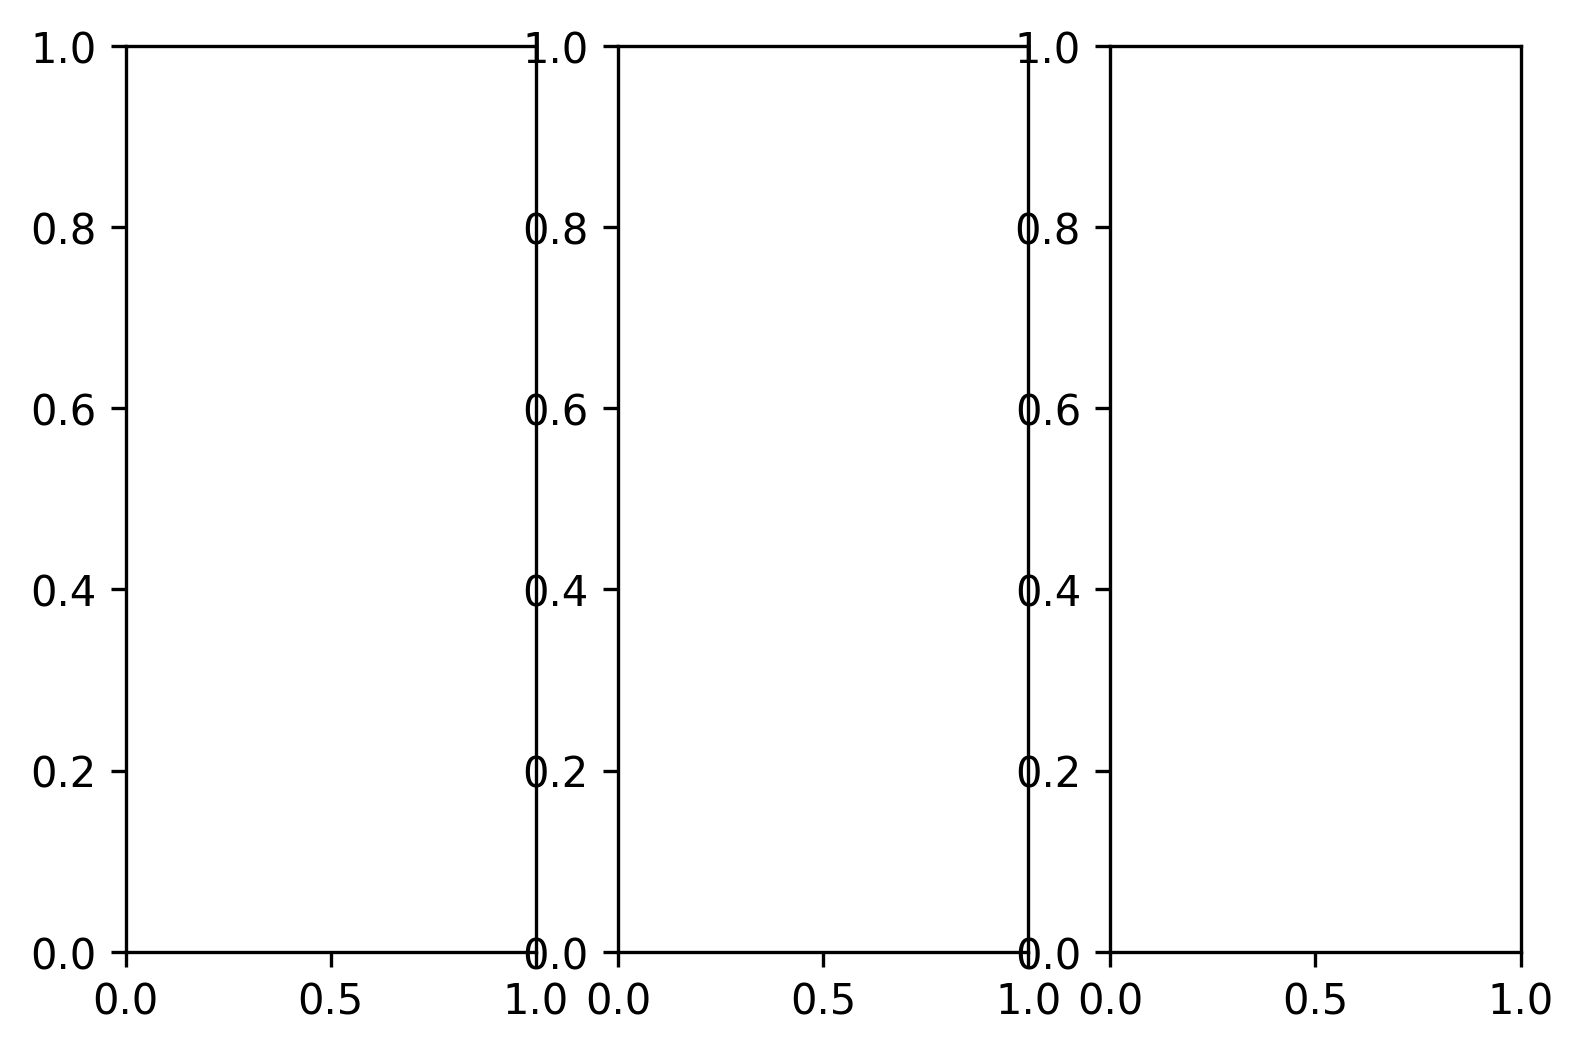

In [7]:
# Plot accuracy vs. noise
fig,ax = plt.subplots(1,3)
for i in range(0,4):
    ax[0].plot(np.hstack((flat_ave_noise[:,i],ave_noise[:,i])),'-o')
for i in range(4,9):    
    ax[1].plot(np.hstack((flat_ave_noise[:,i],ave_noise[:,i])),'-o')
for i in range(9,14):    
    ax[2].plot(np.hstack((flat_ave_noise[:,i],ave_noise[:,i])),'--o')
ax[0].set_ylabel('Accuracy')
fig.text(0.5, 0, 'Type of Noise', ha='center')
ax[0].legend(['svcnn','sae','cnn','vcnn'])
ax[1].legend(['svcnn-lda','sae-lda','cnn-lda','vcnn-lda','rec-lda'])
ax[2].legend(['LDA','LDA-corrupt','QDA','QDA-corrupt','ch'])
ax[1].set_yticks([])
ax[2].set_yticks([])
for i in range(0,3):
    ax[i].set_ylim(0,1)
    ax[i].set_xticks(range(0,6))
    ax[i].set_xticklabels(['Flat','1','2','3','4','5'])

fig.set_tight_layout(True)

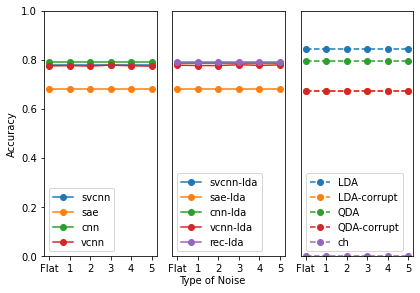

In [10]:
# Plot accuracy vs. noise
fig,ax = plt.subplots(1,3)
for i in range(0,4):
    ax[0].plot(np.hstack((flat_ave_clean[:,i],ave_clean[:,i])),'-o')
for i in range(4,9):    
    ax[1].plot(np.hstack((flat_ave_clean[:,i],ave_clean[:,i])),'-o')
for i in range(9,14):    
    ax[2].plot(np.hstack((flat_ave_clean[:,i],ave_clean[:,i])),'--o')
ax[0].set_ylabel('Accuracy')
fig.text(0.5, 0, 'Type of Noise', ha='center')
ax[0].legend(['svcnn','sae','cnn','vcnn'])
ax[1].legend(['svcnn-lda','sae-lda','cnn-lda','vcnn-lda','rec-lda'])
ax[2].legend(['LDA','LDA-corrupt','QDA','QDA-corrupt','ch'])
ax[1].set_yticks([])
ax[2].set_yticks([])
for i in range(0,3):
    ax[i].set_ylim(0,1)
    ax[i].set_xticks(range(0,6))
    ax[i].set_xticklabels(['Flat','1','2','3','4','5'])

fig.set_tight_layout(True)

In [3]:
# Loop through noise
acc_all, acc_noise, acc_clean, file_name = loop.loop_noise(raw, params, sub_type, load=False, n_train='fullgaussflat4', train_scale=5, n_test=0,epochs=30, batch_size = 128, sparsity=True,dt='cv',feat_type='feat',noise=True, latent_dim=4)

10 - clf_loss: 0.7969 - decoder_accuracy: 0.0039 - clf_accuracy: 0.6803 - val_loss: 1.0422 - val_decoder_loss: 0.0800 - val_clf_loss: 0.9572 - val_decoder_accuracy: 0.0020 - val_clf_accuracy: 0.6190
Epoch 11/30
18900/18900 [==============================] - 2s 126us/sample - loss: 0.8524 - decoder_loss: 0.0848 - clf_loss: 0.7650 - decoder_accuracy: 0.0039 - clf_accuracy: 0.6941 - val_loss: 1.0159 - val_decoder_loss: 0.0789 - val_clf_loss: 0.9367 - val_decoder_accuracy: 0.0020 - val_clf_accuracy: 0.6186
Epoch 12/30
18900/18900 [==============================] - 2s 115us/sample - loss: 0.8229 - decoder_loss: 0.0882 - clf_loss: 0.7323 - decoder_accuracy: 0.0039 - clf_accuracy: 0.7081 - val_loss: 0.9926 - val_decoder_loss: 0.0857 - val_clf_loss: 0.9000 - val_decoder_accuracy: 0.0020 - val_clf_accuracy: 0.6271
Epoch 13/30
18900/18900 [==============================] - 2s 114us/sample - loss: 0.8014 - decoder_loss: 0.0913 - clf_loss: 0.7074 - decoder_accuracy: 0.0039 - clf_accuracy: 0.7258 -

## Latent Dimension Loop

In [ ]:
# loop through latent dimensions
sub_all, sub_noise, sub_clean, file_name = loop.loop_alldim(raw, params, sub_type, load=False, n_train='gaussflat', train_scale=3, n_test='gauss', test_scale=1,epochs=30, sparsity=True, dt='0414')

In [ ]:
# load results from latent dimension loop, sparse vs. not sparse
sub_all, sub_noise, sub_clean, sparse_all, sparse_noise, sparse_clean = loop.load_results(params, sub_type=sub_type,sparsity=True, dt='0414')
sub_all, sub_noise, sub_clean, ave_all, ave_noise, ave_clean = loop.load_results(params, sub_type=sub_type,sparsity=False, dt='0414')

In [ ]:
# Plot accuracy vs. latent dimension
fig,ax = plt.subplots(1,2)
for i in range(0,4):
    ax[0].plot(ave_noise[:,i],'-o')
    ax[1].plot(sparse_noise[:,i],'-o')
ax[0].set_ylabel('Accuracy')
fig.text(0.5, 0.04, 'Latent Dimension', ha='center')
ax[0].set_ylim(0.5,1)
ax[1].set_ylim(0.5,1)
ax[0].legend(['svcnn','sae','cnn','vcnn'])